In [1]:
!pip install -q tensorflow==2.12

In [2]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [3]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

# Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Classes das imagens


In [6]:
imagens_treino = imagens_teste / 255.0
imagens_teste = imagens_teste / 255.0

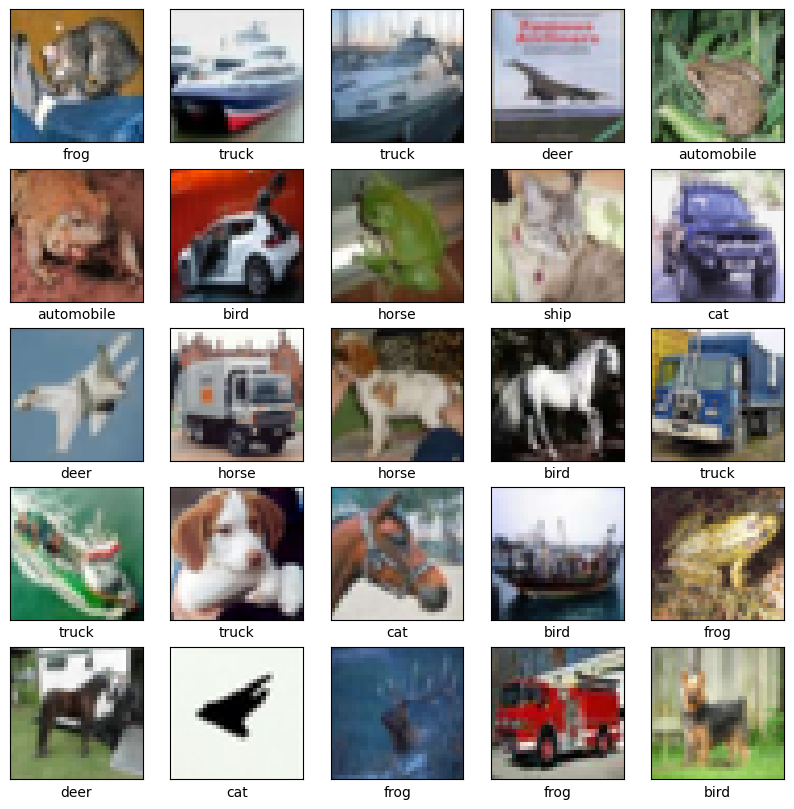

In [7]:
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

In [8]:

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [9]:
modelo_lia.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [10]:
# Compilação do modelo 
modelo_lia.compile(optimizer = 'adam', 
                   loss = 'sparse_categorical_crossentropy', 
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

In [11]:
%%time
history = modelo_lia.fit(imagens_treino, 
                         labels_treino, 
                         epochs = 10, 
                         validation_data = (imagens_teste, labels_teste))

ValueError: Data cardinality is ambiguous:
  x sizes: 10000
  y sizes: 50000
Make sure all arrays contain the same number of samples.

In [12]:
erro_teste, acc_teste = modelo_lia.evaluate(imagens_teste, labels_teste, verbose = 2)


313/313 - 2s - loss: 2.3176 - accuracy: 0.0815 - 2s/epoch - 8ms/step


In [13]:
nova_imagem = Image.open("nova_imagem.jpg")

In [14]:
nova_imagem = nova_imagem.resize((32,32))

In [15]:

# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0


In [16]:

# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0) 

In [17]:
previsao = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 116ms/step


In [18]:
print(previsao)

[[0.1090883  0.10311035 0.11203981 0.10712825 0.09681053 0.07949799
  0.10961621 0.10921425 0.08863474 0.08485953]]


In [19]:
classe_prevista = np.argmax(previsao)
nome = nomes_classes[classe_prevista]

In [20]:
print(nome)

bird
